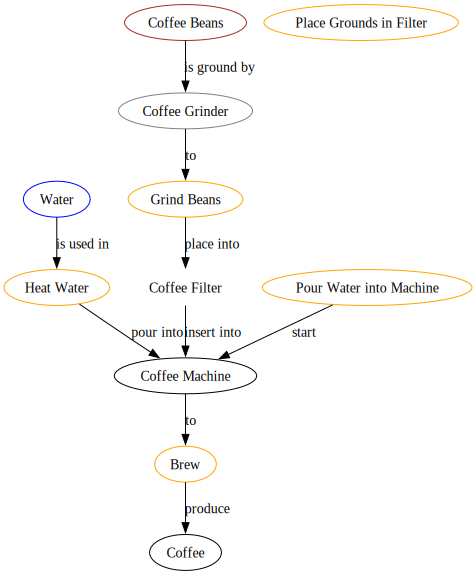

The process of brewing coffee involves several key steps and components as illustrated in the knowledge graph:

1. **Coffee Beans** are the starting material. They are whole, raw beans that need to be ground before brewing.
2. **Coffee Grinder** is used to grind the coffee beans into grounds.
3. **Grind Beans** is the process of breaking down coffee beans into smaller particles to increase the surface area for extraction.
4. **Coffee Filter** is used to hold the coffee grounds and prevent them from getting into the final brew.
5. **Coffee Machine** is the apparatus that will heat the water, pour it over the grounds, and brew the coffee.
6. **Water** is a crucial ingredient in coffee brewing.
7. **Heat Water** is the process to bring the water to the right temperature for brewing.
8. **Place Grounds in Filter** involves putting the ground coffee into the filter.
9. **Pour Water into Machine** is the action of adding water to the coffee machine for heating and brewing.
10. **Brew** is the actual process where hot water is passed through the grounds, extracting flavors and compounds to create coffee.
11. **Coffee** is the final product, a brewed beverage ready for consumption.

To summarize the brewing process, you start with whole coffee beans, grind them, place the grounds in a filter, insert the filter into the coffee machine, heat water, pour the water into the machine, and then start the machine to brew the coffee, resulting in the final beverage.

In [1]:
from graphviz import Digraph
from pydantic import BaseModel, Field
from typing import List
from chatlab import Chat, system


class Node(BaseModel):
    id: int
    label: str
    color: str


class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"


class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)


def visualize_knowledge_graph(kg: KnowledgeGraph, comment: str = "Knowledge Graph"):
    """Visualizes a knowledge graph using graphviz."""
    dot = Digraph(comment=comment)

    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    display(dot)

    return "<<Graphic displayed inline for the user to see>>"


chat = Chat(
    system(
        "You are running inside a jupyter notebook. Your responses appear as markdown in the notebook. Functions you run can produce side effects."
    ),
    model="gpt-4-1106-preview",
    chat_functions=[visualize_knowledge_graph],
)

await chat("Visually teach me about the process of brewing coffee.", temperature=0.9)

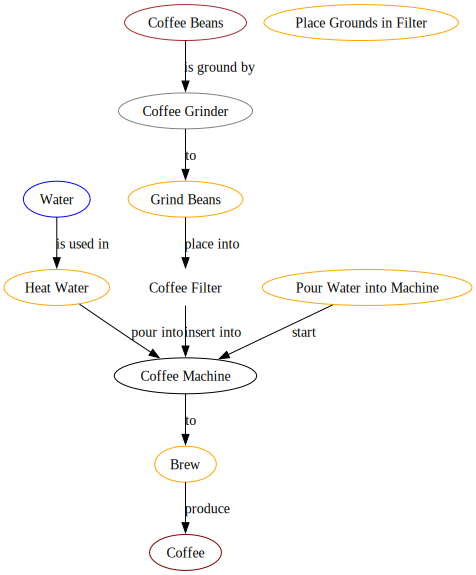

Here is the corrected visualization of the coffee brewing process:

1. **Coffee Beans** are the starting material. They are whole, raw beans that need to be ground before brewing.
2. **Coffee Grinder** is used to grind the coffee beans into grounds.
3. **Grind Beans** is the process of breaking down coffee beans into smaller particles to increase the surface area for extraction.
4. **Coffee Filter** is used to hold the coffee grounds and prevent them from getting into the final brew.
5. **Coffee Machine** is the apparatus that will heat the water, pour it over the grounds, and brew the coffee.
6. **Water** is a crucial ingredient in coffee brewing.
7. **Heat Water** is the process to bring the water to the right temperature for brewing.
8. **Place Grounds in Filter** involves putting the ground coffee into the filter.
9. **Pour Water into Machine** is the action of adding water to the coffee machine for heating and brewing.
10. **Brew** is the actual process where hot water is passed through the grounds, extracting flavors and compounds to create coffee.
11. **Coffee** is the final product, a brewed beverage ready for consumption, represented here with the color maroon.

The process flow is as follows: Coffee beans are ground by a coffee grinder, the grounds are placed into a coffee filter, which is then inserted into the coffee machine. Water is heated and poured into the machine, which then starts the brewing process, resulting in the production of coffee.

In [2]:
await chat("A warning came up saying that darkbrown is not a known color.")